In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
ress_nn = pd.read_csv("img/res_nn.gz",  index_col=0)
ress_sm = pd.read_csv("img/alpha_0.03_conv_limerr_0.1.csv.gz",  index_col=0)

In [4]:
points_sm = []
for I in ress_sm.keys():
    for v in ress_sm[I]:
        points_sm.append([int(I), v])
points_sm=np.array(points_sm)

In [5]:
ress_sm_np = ress_sm.to_numpy()

In [6]:
import matplotlib.colors as mcolors
mcolors.TABLEAU_COLORS['tab:green']

'#2ca02c'

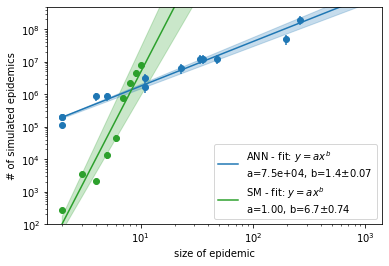

In [8]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b):
    return a * x ** b
def func_3(x, a, b, c):
    return a * x ** b + c

def func_lin(x, a, b):
    return a + x * b

def func_plt(x, a, b):
    return np.exp(a + np.log(x) * b)

def shadow(x, popt, pcov, func, nstd=1, color="red"):
    perr = np.sqrt(np.diag(pcov))
    #for i in range(len(popt)):
    #    print(str(popt[i])+' +- '+str(perr[i]))
    perr[0]=0
    # prepare confidence level curves
    popt_up = popt + nstd * perr
    popt_dw = popt - nstd * perr

    fit_up = func(x, *popt_up)
    fit_dw = func(x, *popt_dw)
    #label=f'{nstd}-sigma interval', 
    plt.fill_between(x, fit_up, fit_dw, alpha=.25, color=color)
    return perr

x_sm_lim=9
x = np.array([float(x) for x in ress_sm.keys()])
y=ress_sm_np.mean(axis=0)
yerr=ress_sm_np.std(axis=0)/np.sqrt(ress_sm_np.shape[0])
b = plt.errorbar(ress_nn["x"], ress_nn["y"], yerr=ress_nn["err"], fmt="o")
a = plt.errorbar(x[:x_sm_lim], y[:x_sm_lim], yerr=yerr[:x_sm_lim], fmt="o", color=mcolors.TABLEAU_COLORS['tab:green'])
popt, pcov = curve_fit(func_lin, np.log(x[:x_sm_lim]), np.log(y[:x_sm_lim]), p0=(1,3.95))

init_fit=0
popt_nn, pcov_nn = curve_fit(func_lin, np.log(ress_nn["x"][init_fit:]), np.log(ress_nn["y"][init_fit:]),sigma=np.log(ress_nn["err"][init_fit:]), p0=(150000,10.95))

x_curve=np.power(2, np.arange(1,11))
perr=shadow(x_curve, popt, pcov, func_plt, color=a[0].get_color())
perr_nn=shadow(x_curve, popt_nn, pcov_nn, func_plt, color=b[0].get_color())

plt.plot(x_curve, np.exp(func_lin(np.log(x_curve), *popt_nn)), color=b[0].get_color(),
         label=f'ANN - fit: $y=ax^b$\na={np.exp(popt_nn[0]):.1e}, b={popt_nn[1]:.1f}$\pm${perr_nn[1]:.2f}')
plt.plot(x_curve, np.exp(func_lin(np.log(x_curve), *popt)), color=a[0].get_color(),
         label=f'SM - fit: $y=ax^b$\na={np.exp(popt[0]):.2f}, b={popt[1]:.1f}$\pm${perr[1]:.2f}')


#plt.title("convergence")
plt.xlabel("size of epidemic")
plt.ylabel("# of simulated epidemics")
plt.loglog()
plt.ylim(1e2, 5e8)
plt.legend()
plt.savefig("img/convergence.pdf")

/var/folders/jy/gjfds_4d4xsfqkq02klzlj240000gn/T/ipykernel_83823/3142591814.py:30: RuntimeWarning: overflow encountered in exp
  plt.plot(x_curve, np.exp(func_exp(x_curve, *popt_exp)), color=a[0].get_color(),
/var/folders/jy/gjfds_4d4xsfqkq02klzlj240000gn/T/ipykernel_83823/3142591814.py:13: RuntimeWarning: overflow encountered in exp
  return a * np.exp(x * b) +2
/var/folders/jy/gjfds_4d4xsfqkq02klzlj240000gn/T/ipykernel_83823/3142591814.py:13: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(x * b) +2
/var/folders/jy/gjfds_4d4xsfqkq02klzlj240000gn/T/ipykernel_83823/3142591814.py:33: RuntimeWarning: overflow encountered in exp
  plt.plot(x__, np.exp(func_exp(x__, 3,0.15)), color="red",


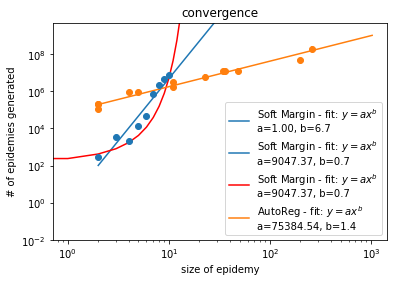

In [8]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b):
    return a * x ** b
def func_3(x, a, b, c):
    return a * x ** b + c

def func_lin(x, a, b):
    return a + x * b

def func_exp(x, a, b):
    return a * np.exp(x * b) +2


x_sm_lim=9
x = np.array([float(x) for x in ress_sm.keys()])
y=ress_sm_np.mean(axis=0)
yerr=ress_sm_np.std(axis=0)/np.sqrt(ress_sm_np.shape[0])
a = plt.errorbar(x[:x_sm_lim], y[:x_sm_lim], yerr=yerr[:x_sm_lim], fmt="o")
b = plt.errorbar(ress_nn["x"], ress_nn["y"], yerr=ress_nn["err"], fmt="o")
popt, pcov = curve_fit(func_lin, np.log(x[:x_sm_lim]), np.log(y[:x_sm_lim]), p0=(1,3.95))
popt_exp, pcov_exp = curve_fit(func_exp, x[:x_sm_lim], y[:x_sm_lim], p0=(3,.05))

popt_nn, pcov = curve_fit(func_lin, np.log(ress_nn["x"]), np.log(ress_nn["y"]),sigma=np.log(ress_nn["err"]), p0=(150000,10.95))

x_curve=np.power(2, np.arange(1,11))
plt.plot(x_curve, np.exp(func_lin(np.log(x_curve), *popt)), color=a[0].get_color(),
         label=f'Soft Margin - fit: $y=ax^b$\na={np.exp(popt[0]):.2f}, b={popt[1]:.1f}')
plt.plot(x_curve, np.exp(func_exp(x_curve, *popt_exp)), color=a[0].get_color(),
         label=f'Soft Margin - fit: $y=ax^b$\na={popt_exp[0]:.2f}, b={popt_exp[1]:.1f}')
x__=np.arange(0,10000)
plt.plot(x__, np.exp(func_exp(x__, 3,0.15)), color="red",
         label=f'Soft Margin - fit: $y=ax^b$\na={popt_exp[0]:.2f}, b={popt_exp[1]:.1f}')

plt.plot(x_curve, np.exp(func_lin(np.log(x_curve), *popt_nn)), color=b[0].get_color(),
         label=f'AutoReg - fit: $y=ax^b$\na={np.exp(popt_nn[0]):.2f}, b={popt_nn[1]:.1f}')

plt.title("convergence")
plt.xlabel("size of epidemy")
plt.ylabel("# of epidemies generated")
plt.loglog()
plt.ylim(1e-2, 5e9)
plt.legend()
#plt.savefig("img/convergence.pdf")